In [3]:
import numpy as np
import h5py
import glob
import os
from pycbc import conversions
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean+0.5     # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 22,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : False,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

# Collecting all the posterior files

In [4]:
path = './../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw*/'
path_4events = './../t3_default_rerun4/mpvnosmallrun_output/samples_files/'
path_bns = './../bns/t1/bns-parity_output/samples_files/'
path_rerun1 = '/work/yifan.wang/gw190521_mpvinverse/1019_nosmall/1107/mpi-190924/mpirun_output/samples_files/'
path_rerun2 = '/work/yifan.wang/gw190521_mpvinverse/1019_nosmall/1107/mpi-190725/mpvnosmallrun_output/samples_files/'
path_rerun3 = '/work/yifan.wang/gw190521_mpvinverse/1019_nosmall/1107/mpi-190728/mpvnosmallrun_output/samples_files/'
filename = '/H1L1V1-INFERENCE*.hdf'

posdirect = glob.glob(path+filename) + glob.glob(path_4events+filename) \
            + glob.glob(path_rerun1+filename) + glob.glob(path_rerun2+filename) \
            + glob.glob(path_rerun3+filename) + glob.glob(path_bns+filename)

posdirect.remove('./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190924_021846_ID0000053/H1L1V1-INFERENCE_GW190924_021846-1126259200-400.hdf')
posdirect.remove('./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190725_174728_ID0000012/H1L1V1-INFERENCE_GW190725_174728-1126259200-400.hdf')

posname = []
for p in posdirect:
    posname.append(os.path.basename(p))
    
np.size(posdirect)

56

# There are 56 events (except GW190521)

In [5]:
mpvinv = []
mpvinvplus = []

for i,path in enumerate(posdirect):
    f = h5py.File(path,'r')
    print('Analyzing the '+str(i)+'th event:'+path)

    mpvinv_vv = f['samples']['parity_mpvinverse'][()]
    mpvinv.append(mpvinv_vv)
    mpvinvplus.append(mpvinv_vv[mpvinv_vv>=0])
    f.close()

Analyzing the 0th event:./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190719_215514_ID0000007/H1L1V1-INFERENCE_GW190719_215514-1126259200-400.hdf
Analyzing the 1th event:./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170729_185629_ID0000014/H1L1V1-INFERENCE_GW170729_185629-1126259200-400.hdf
Analyzing the 2th event:./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190519_153544_ID0000041/H1L1V1-INFERENCE_GW190519_153544-1126259200-400.hdf
Analyzing the 3th event:./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190412_053044_ID0000004/H1L1V1-INFERENCE_GW190412_053044-1126259200-400.hdf
Analyzing the 4th event:./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190707_093326_ID0000028/H1L1V1-INFERENCE_GW190707_093326

Analyzing the 41th event:./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170814_103043_ID0000037/H1L1V1-INFERENCE_GW170814_103043-1126259200-400.hdf
Analyzing the 42th event:./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190620_030421_ID0000013/H1L1V1-INFERENCE_GW190620_030421-1126259200-400.hdf
Analyzing the 43th event:./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170809_082821_ID0000039/H1L1V1-INFERENCE_GW170809_082821-1126259200-400.hdf
Analyzing the 44th event:./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190413_134308_ID0000005/H1L1V1-INFERENCE_GW190413_134308-1126259200-400.hdf
Analyzing the 45th event:./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190421_213856_ID0000027/H1L1V1-INFERENCE_GW190421_2

# Rank the order of mpvinv posterior

In [8]:
mpvinv_90 = [np.quantile(v,0.9) for v in mpvinvplus]
mpvinv_90_arg = np.argsort(mpvinv_90)

In [9]:
mpvinv_90[mpvinv_90_arg[0]]

169.9666855025337

# Rank them by how many sigma is deviated from zero for the median

In [12]:
mpvinv_sigma = [np.median(v)/np.std(v) for v in mpvinvplus]
mpvinv_sigma_arg = np.argsort(mpvinv_sigma)

In [21]:
for i in mpvinv_sigma_arg[:]:
    print(posname[i],mpvinv_sigma[i])

H1L1V1-INFERENCE_GW190512_180714-1126259200-400.hdf 0.2054522219964356
H1L1V1-INFERENCE_GW190708_232457-1126259200-400.hdf 0.2060306538225892
H1L1V1-INFERENCE_GW190707_093326-1126259200-400.hdf 0.26350397847583523
H1L1V1-INFERENCE_GW190408_181802-1126259200-400.hdf 0.31844645177933456
H1L1V1-INFERENCE_GW190828_063405-1126259200-400.hdf 0.3324852916725196
H1L1V1-INFERENCE_GW190513_205428-1126259200-400.hdf 0.3338317896932249
H1L1V1-INFERENCE_GW190413_052954-1126259200-400.hdf 0.35087664929572127
H1L1V1-INFERENCE_GW190630_185205-1126259200-400.hdf 0.3785423558515306
H1L1V1-INFERENCE_GW190727_060333-1126259200-400.hdf 0.38468891032391267
H1L1V1-INFERENCE_GW190412_053044-1126259200-400.hdf 0.3939704920552229
H1L1V1-INFERENCE_GW170104_101158-1126259200-400.hdf 0.39718504772620866
H1L1V1-INFERENCE_GW170121_212536-1126259200-400.hdf 0.4413898702303961
H1L1V1-INFERENCE_GW190915_235702-1126259200-400.hdf 0.4488732431127457
H1L1V1-INFERENCE_GW151226_033853-1126259200-400.hdf 0.46651918953921456


# No wonder. I rerun 190725, because it shows deviation with 3-detectors, which hints that H1 has nonGaussian noise. GW190924 shows multimodality, nevertheless it still shows support for 0. Thus I shrink the prior range for it, 

# I chose to use the 90 percent quantile as a ranking to sort the events

# Plotting the paper figure

In [70]:
binmin = -200
binmax = 200
binnum = int(int(binmax-binmin)*4 + 1)
print(binnum)
bins = np.linspace(binmin,binmax,binnum)

1601


In [71]:
bins, bins[int(binnum/2)]

(array([-200.  , -199.75, -199.5 , ...,  199.5 ,  199.75,  200.  ]), 0.0)

In [53]:
upper_kde = []
def find_upper(kde_mpvinv,norm_positive):
    j=int(binnum/2)
    while np.sum( kde_mpvinv( bins[ int(binnum/2):j ] ) ) /norm_positive * (bins[2]-bins[1])  <0.9:
        j=j+1
    return bins[j-1]

for i in range( len(mpvinv) ):
    name = posname[i]
    print('analyzing',name)
    data = mpvinv[i]
    #kde the distribution
    kde = stats.gaussian_kde(data)
    norm_positive = np.sum( kde( bins[int(binnum/2):] ) ) * ( bins[2]-bins[1] )
    upper_kde.append(find_upper(kde,norm_positive))

analyzing H1L1V1-INFERENCE_GW190719_215514-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW170729_185629-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW190519_153544-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW190412_053044-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW190707_093326-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW190424_180648-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW190408_181802-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW170304_163753-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW190630_185205-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW170403_230611-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW170121_212536-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW190828_063405-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW190708_232457-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW190517_055101-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW190926_050336-1126259200-400.hdf
analyzing H1L1V1-INFERENCE_GW190915_235702-1126259200-400.hdf
analyzin

In [55]:
upper_kde_sortarg = np.argsort(upper_kde)

In [56]:
for i in upper_kde_sortarg:
    print(posname[i],upper_kde[i])

H1L1V1-INFERENCE_GW190708_232457-1126259200-400.hdf 116.0
H1L1V1-INFERENCE_GW190512_180714-1126259200-400.hdf 120.0
H1L1V1-INFERENCE_GW190828_063405-1126259200-400.hdf 128.0
H1L1V1-INFERENCE_GW190412_053044-1126259200-400.hdf 132.0
H1L1V1-INFERENCE_GW190408_181802-1126259200-400.hdf 132.0
H1L1V1-INFERENCE_GW190513_205428-1126259200-400.hdf 136.0
H1L1V1-INFERENCE_GW190727_060333-1126259200-400.hdf 136.0
H1L1V1-INFERENCE_GW151226_033853-1126259200-400.hdf 140.0
H1L1V1-INFERENCE_GW190413_052954-1126259200-400.hdf 140.0
H1L1V1-INFERENCE_GW190630_185205-1126259200-400.hdf 144.0
H1L1V1-INFERENCE_GW190707_093326-1126259200-400.hdf 144.0
H1L1V1-INFERENCE_GW190915_235702-1126259200-400.hdf 144.0
H1L1V1-INFERENCE_GW170104_101158-1126259200-400.hdf 144.0
H1L1V1-INFERENCE_GW190930_133541-1126259200-400.hdf 148.0
H1L1V1-INFERENCE_GW151012_095443-1126259200-400.hdf 148.0
H1L1V1-INFERENCE_GW170823_131358-1126259200-400.hdf 152.0
H1L1V1-INFERENCE_GW170121_212536-1126259200-400.hdf 152.0
H1L1V1-INFEREN

analyzing H1L1V1-INFERENCE_GW190708_232457-1126259200-400.hdf
check the normalization 1.0
analyzing H1L1V1-INFERENCE_GW190512_180714-1126259200-400.hdf
check the normalization 1.0
analyzing H1L1V1-INFERENCE_GW190828_063405-1126259200-400.hdf
check the normalization 1.0
analyzing H1L1V1-INFERENCE_GW190412_053044-1126259200-400.hdf
check the normalization 1.0
analyzing H1L1V1-INFERENCE_GW190408_181802-1126259200-400.hdf
check the normalization 1.0
analyzing H1L1V1-INFERENCE_GW190513_205428-1126259200-400.hdf
check the normalization 1.0
analyzing H1L1V1-INFERENCE_GW190727_060333-1126259200-400.hdf
check the normalization 1.0
analyzing H1L1V1-INFERENCE_GW151226_033853-1126259200-400.hdf
check the normalization 1.0
analyzing H1L1V1-INFERENCE_GW190413_052954-1126259200-400.hdf
check the normalization 1.0
analyzing H1L1V1-INFERENCE_GW190630_185205-1126259200-400.hdf
check the normalization 1.0
analyzing H1L1V1-INFERENCE_GW190707_093326-1126259200-400.hdf
check the normalization 1.0
analyzing 

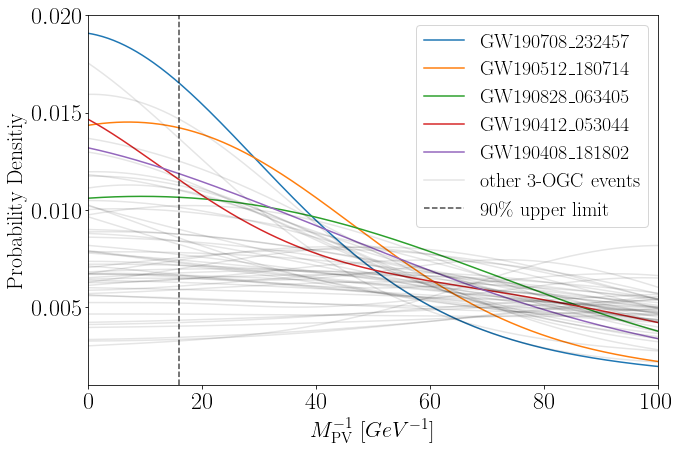

In [80]:
fig = plt.figure();
ax = fig.add_subplot(111)

combine = np.ones(len(bins))
count = 0
for i in upper_kde_sortarg:
#i is the sorted index for Mpvinv
    name = posname[i]
    print('analyzing',name)
    label = name.split('_')[1]+'\_'+name.split('_')[2][:6]
    #read in the data
    data = mpvinv[i]
    #kde the distribution
    kde = stats.gaussian_kde(data)

    #Note here!!!!! that I KDE the Mpvinv for the whole negative and positive range
    #However we really only need the part larger or equal to zero
    norm = np.sum( kde ( bins[int(binnum/2):] ) ) * ( bins[2]-bins[1] )
    
    #combine
    combine *= kde(bins)/norm
    print('check the normalization', np.sum( kde( bins[int(binnum/2):] ) ) * (bins[2]-bins[1])/norm )
    #plot the most stringent six events with colored lines, and the rest with grey
    if count < 5:
        ax.plot(bins[int(binnum/2):], kde(bins[int(binnum/2):])/norm,label=label)
    elif count == 5:
        ax.plot(bins[int(binnum/2):], kde(bins[int(binnum/2):])/norm,color='black',alpha=0.1,label='other 3-OGC events')
    else:
        ax.plot(bins[int(binnum/2):], kde(bins[int(binnum/2):])/norm,color='black',alpha=0.1)
    count=count+1    
#ax.plot(bins,combine/(np.sum(combine[600:])*(bins[2]-bins[1])))
ax.set_xlim(0,100)
ax.set_ylim(0.001,0.02)
#ax.set_yscale('log')
#ax.set_ylim(5e-4,1e-1)
ax.axvline(16,0,10,linestyle='--',color='black',alpha=0.7,label='$90\%$ upper limit')
ax.set_xlabel(r'$M_\mathrm{PV}^{-1}~[GeV^{-1}]$')
ax.set_ylabel('Probability Densitiy')
ax.legend()
fig.savefig('1118mpv.pdf',bbox_inches='tight')

# Find the 90% upper limit for M_pv^{-1}

check the normability: 1.0
16.0


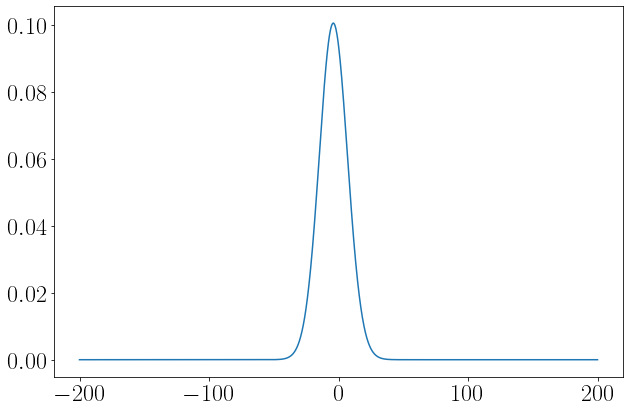

In [81]:
norm_positive = np.sum(combine[int(binnum/2):])*(bins[2]-bins[1])
plt.plot(bins,combine/norm_positive)

i = int(binnum/2)
while (np.sum(combine[int(binnum/2):i]) /norm_positive * (bins[2]-bins[1])  <0.9):
    i = i+1
print('check the normability:', np.sum( combine [ int(binnum/2):] )  * (bins[2]-bins[1]) / norm_positive)
print(bins[i-1])

In [82]:
1/16

0.0625

# Plotting the figures

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190719_215514_ID0000007/H1L1V1-INFERENCE_GW190719_215514-1126259200-400.hdf
0.8869053241201589


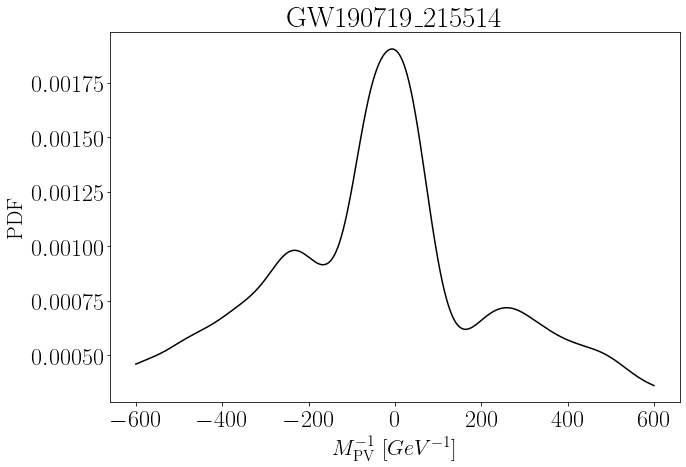

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170729_185629_ID0000014/H1L1V1-INFERENCE_GW170729_185629-1126259200-400.hdf
0.9329426016612353


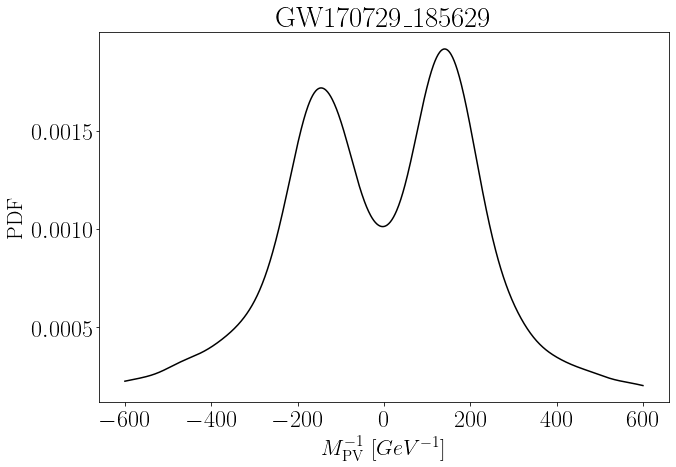

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190519_153544_ID0000041/H1L1V1-INFERENCE_GW190519_153544-1126259200-400.hdf
0.930490041573832


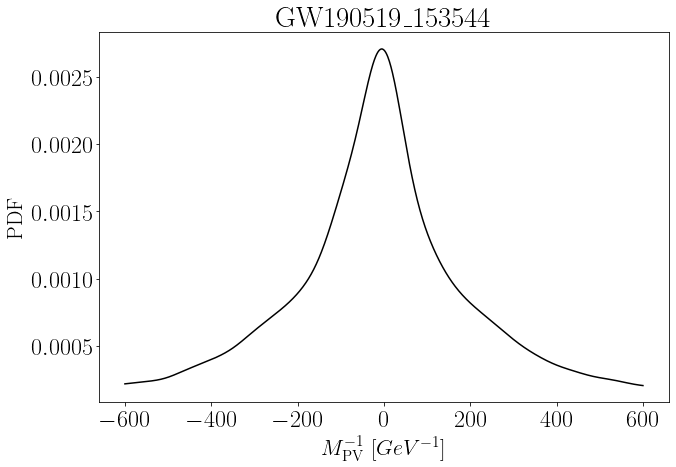

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190412_053044_ID0000004/H1L1V1-INFERENCE_GW190412_053044-1126259200-400.hdf
0.9374133032174895


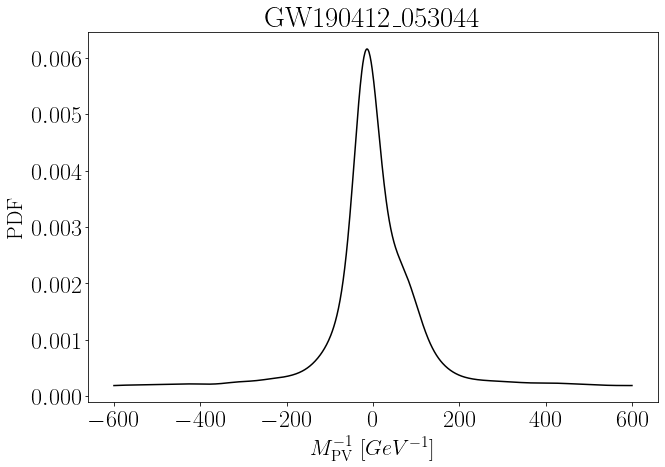

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190707_093326_ID0000028/H1L1V1-INFERENCE_GW190707_093326-1126259200-400.hdf
0.9249607521525086


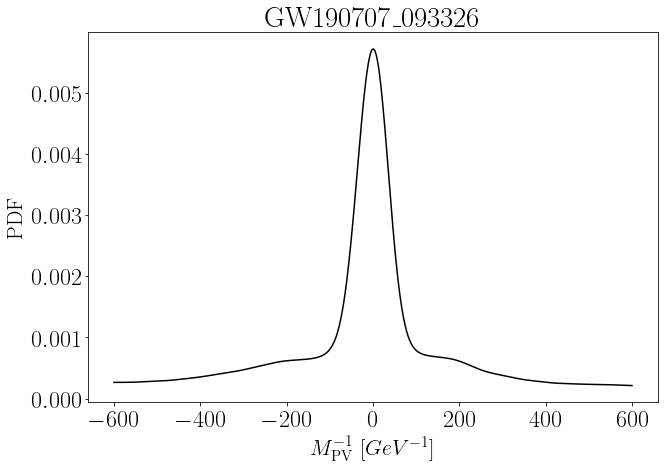

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190424_180648_ID0000036/H1L1V1-INFERENCE_GW190424_180648-1126259200-400.hdf
0.9366249908737186


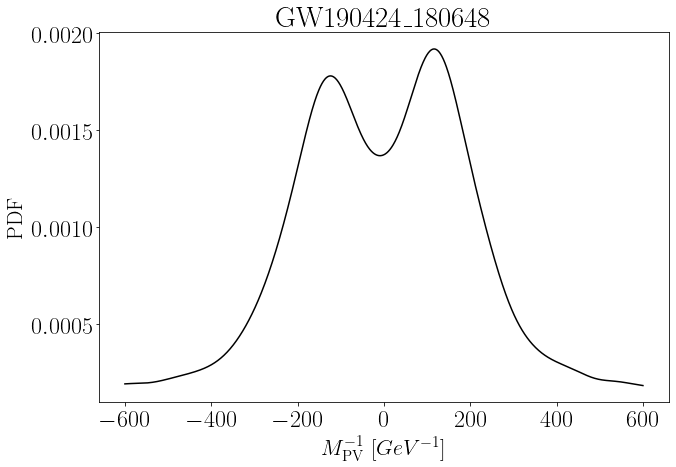

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190408_181802_ID0000045/H1L1V1-INFERENCE_GW190408_181802-1126259200-400.hdf
0.9373257486189457


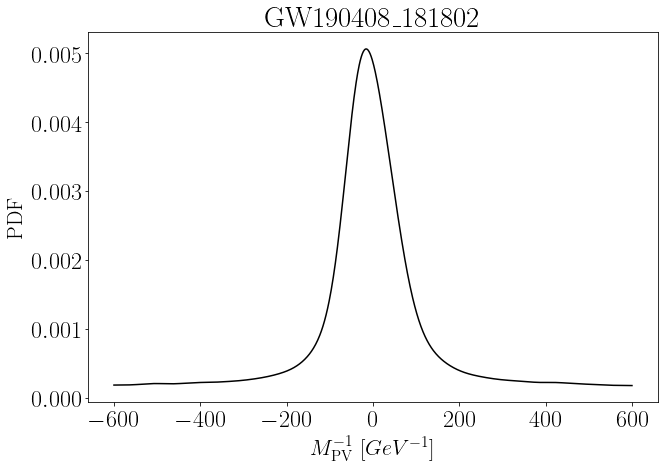

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170304_163753_ID0000015/H1L1V1-INFERENCE_GW170304_163753-1126259200-400.hdf
0.898548438958146


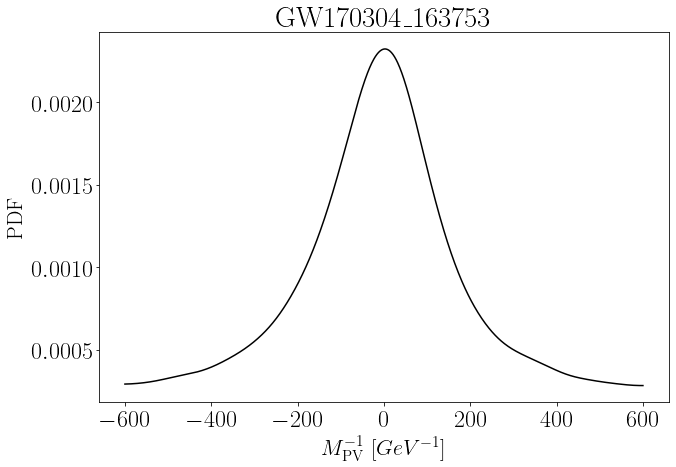

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190630_185205_ID0000001/H1L1V1-INFERENCE_GW190630_185205-1126259200-400.hdf
0.9454471846430033


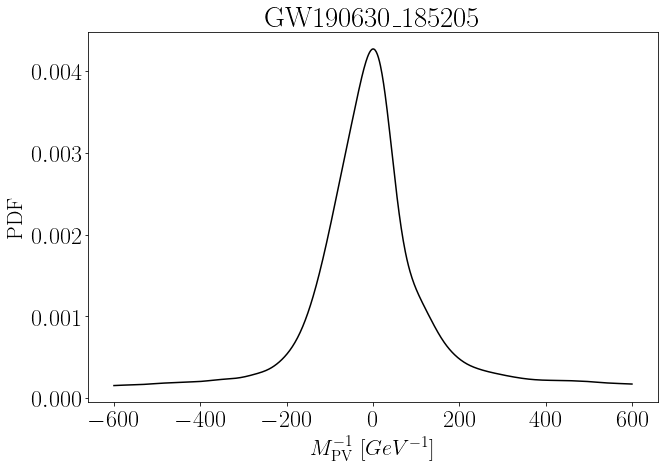

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170403_230611_ID0000032/H1L1V1-INFERENCE_GW170403_230611-1126259200-400.hdf
0.9141284483345102


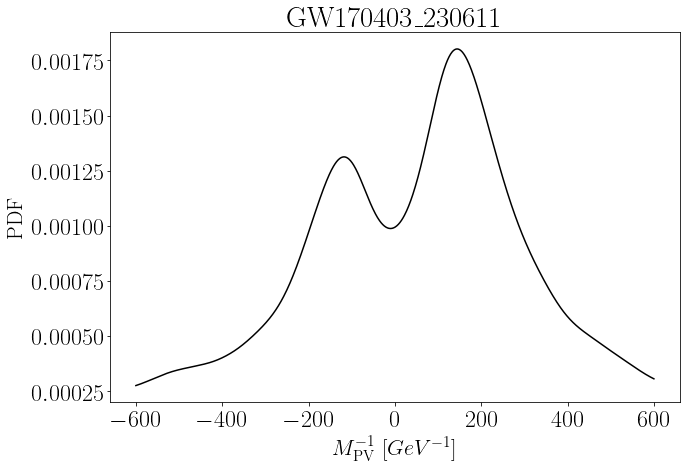

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170121_212536_ID0000035/H1L1V1-INFERENCE_GW170121_212536-1126259200-400.hdf
0.9187147930980682


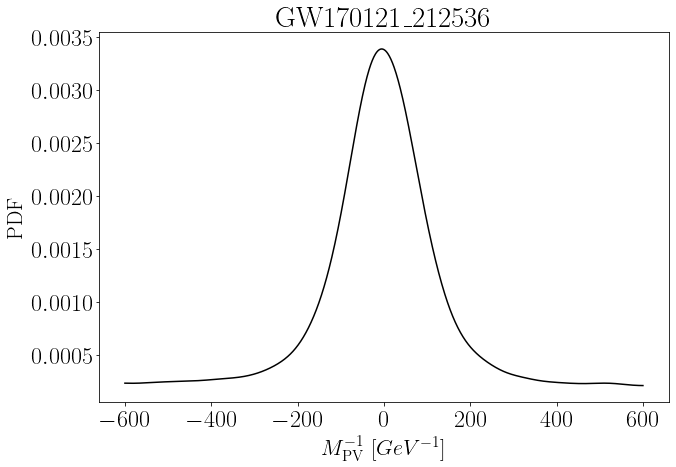

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190828_063405_ID0000003/H1L1V1-INFERENCE_GW190828_063405-1126259200-400.hdf
0.9482614937851432


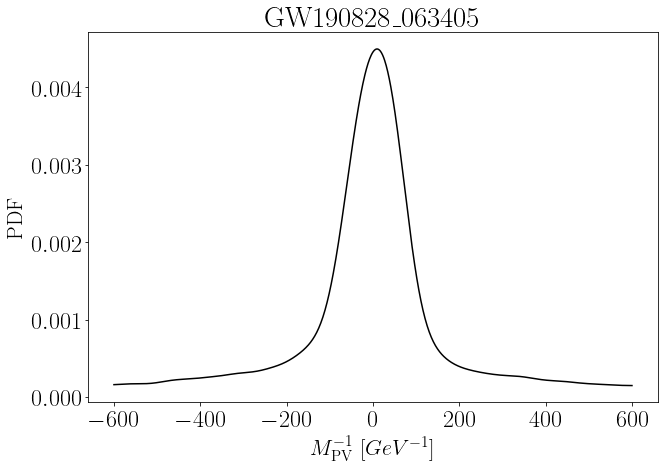

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190708_232457_ID0000031/H1L1V1-INFERENCE_GW190708_232457-1126259200-400.hdf
0.926997956578948


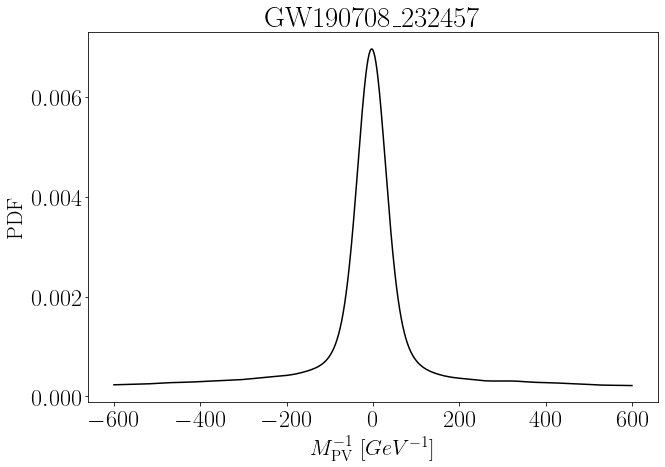

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190517_055101_ID0000033/H1L1V1-INFERENCE_GW190517_055101-1126259200-400.hdf
0.9229182143014538


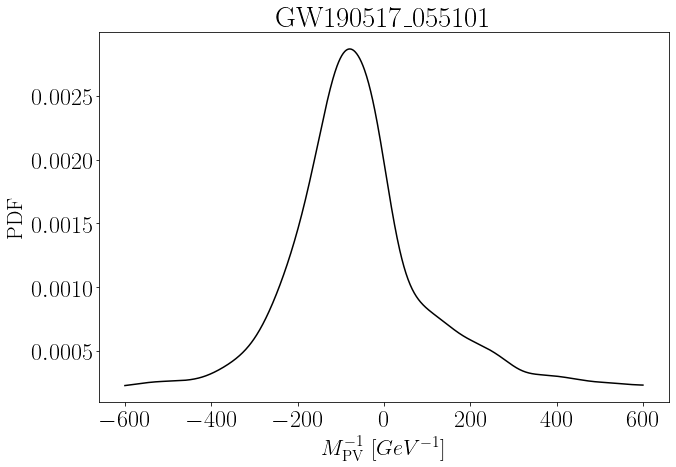

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190926_050336_ID0000023/H1L1V1-INFERENCE_GW190926_050336-1126259200-400.hdf
0.9434125663748141


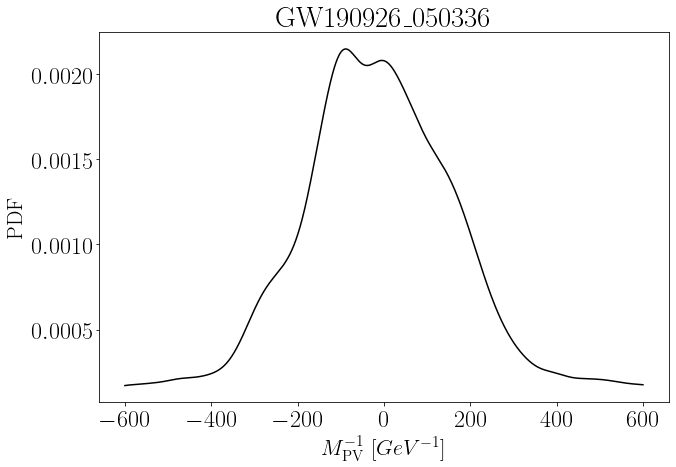

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190915_235702_ID0000051/H1L1V1-INFERENCE_GW190915_235702-1126259200-400.hdf
0.9458996326648073


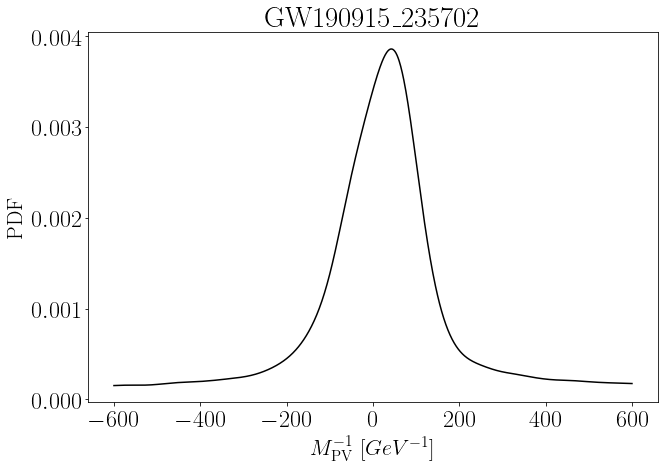

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw151226_033853_ID0000042/H1L1V1-INFERENCE_GW151226_033853-1126259200-400.hdf
0.9021383764494394


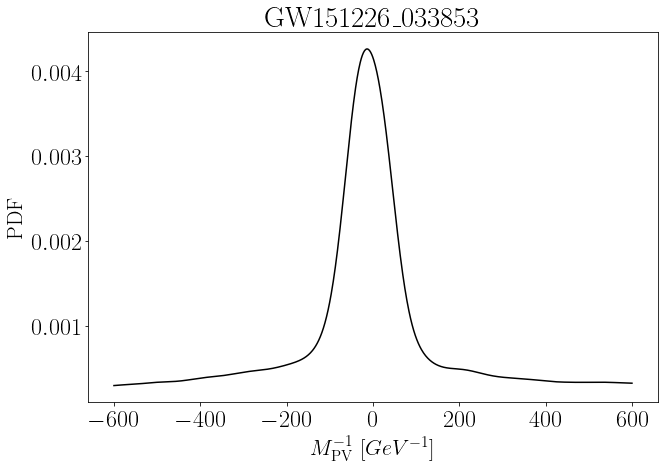

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190720_000836_ID0000030/H1L1V1-INFERENCE_GW190720_000836-1126259200-400.hdf
0.9116576959741929


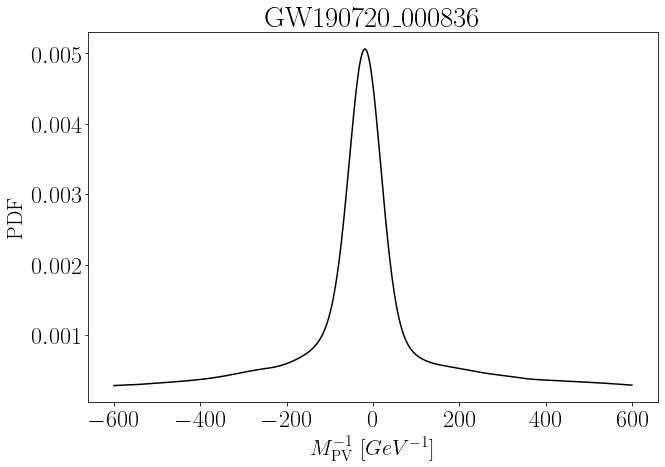

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190803_022701_ID0000019/H1L1V1-INFERENCE_GW190803_022701-1126259200-400.hdf
0.9396987215682117


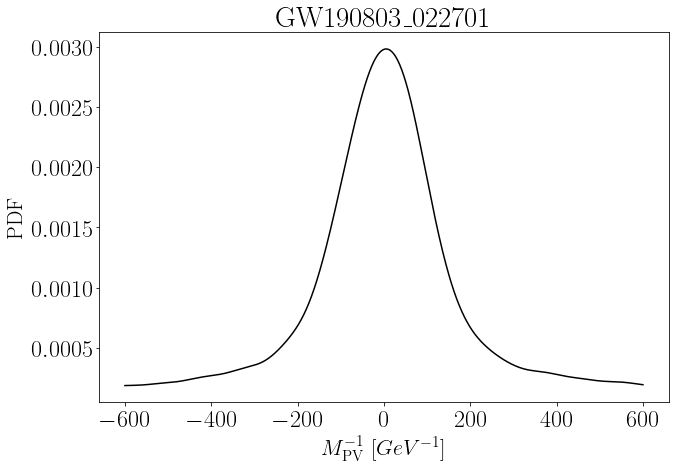

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190910_112807_ID0000040/H1L1V1-INFERENCE_GW190910_112807-1126259200-400.hdf
0.9488254660503225


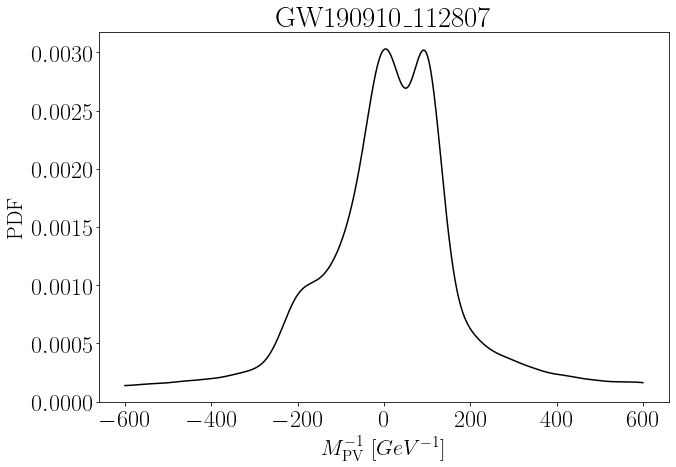

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190814_211039_ID0000020/H1L1V1-INFERENCE_GW190814_211039-1126259200-400.hdf
0.9142633895256899


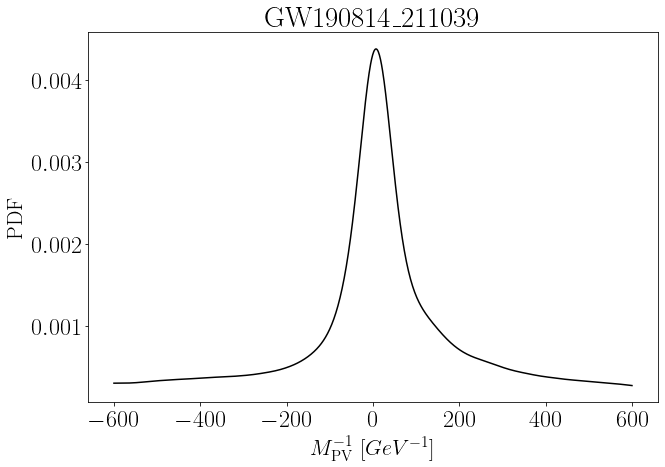

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170818_022509_ID0000022/H1L1V1-INFERENCE_GW170818_022509-1126259200-400.hdf
0.9418567081800822


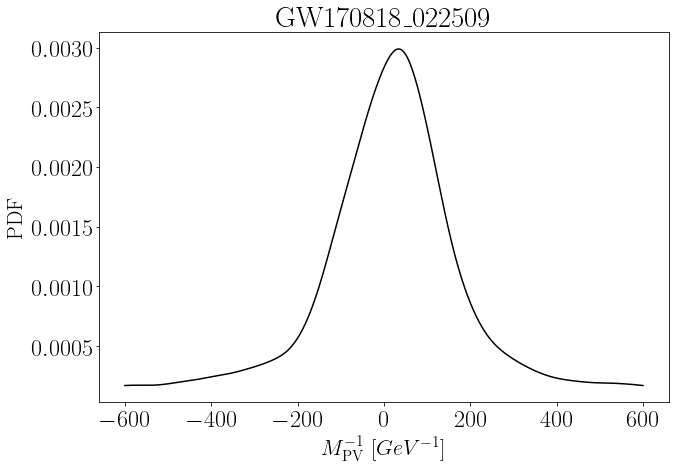

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190413_052954_ID0000043/H1L1V1-INFERENCE_GW190413_052954-1126259200-400.hdf
0.939731663629019


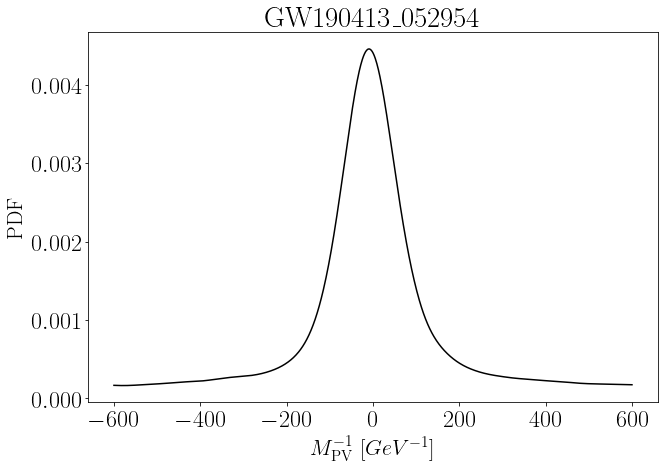

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190916_200658_ID0000038/H1L1V1-INFERENCE_GW190916_200658-1126259200-400.hdf
0.9160767958046855


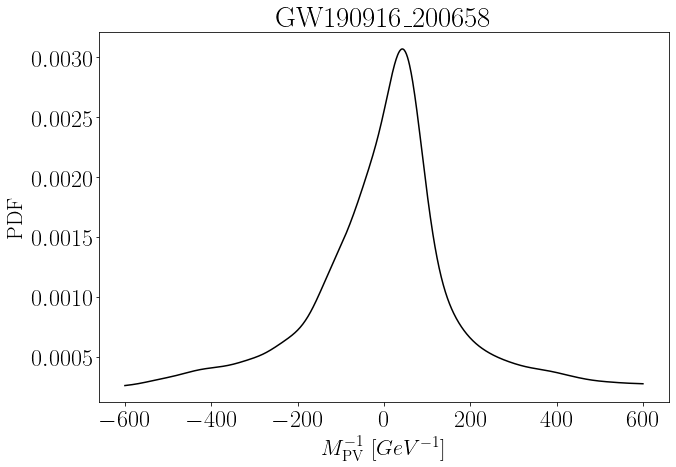

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190701_203306_ID0000008/H1L1V1-INFERENCE_GW190701_203306-1126259200-400.hdf
0.9389409902871995


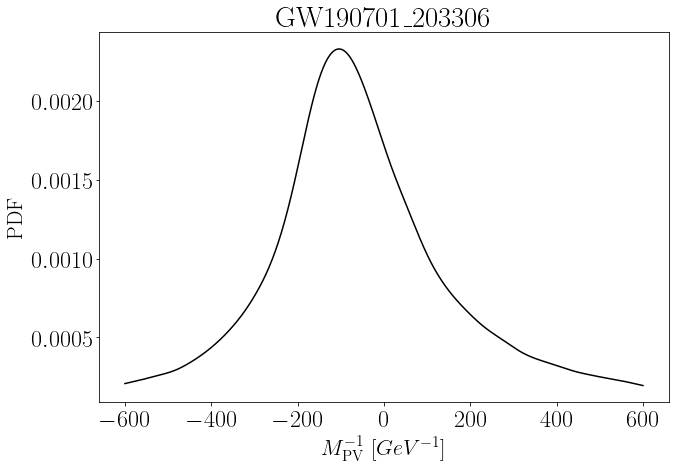

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190513_205428_ID0000025/H1L1V1-INFERENCE_GW190513_205428-1126259200-400.hdf
0.9424841191160072


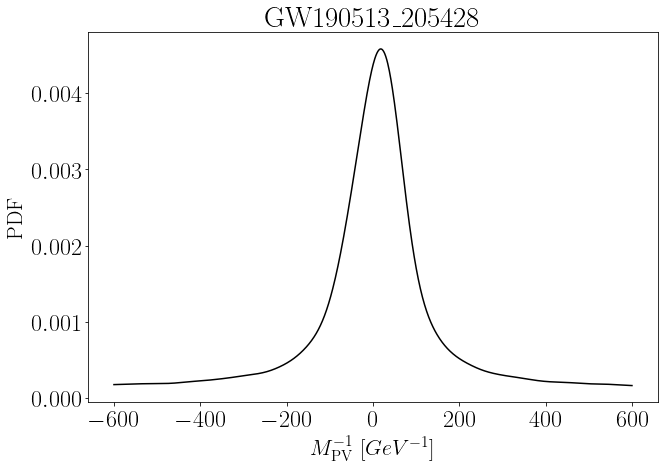

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170727_010430_ID0000034/H1L1V1-INFERENCE_GW170727_010430-1126259200-400.hdf
0.9270875897065393


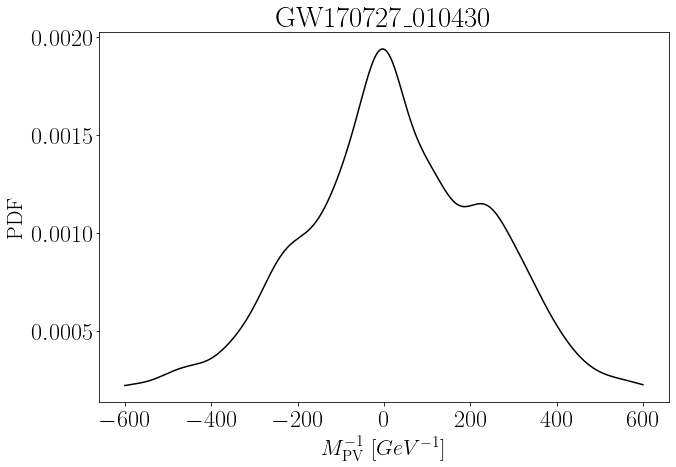

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw150914_095045_ID0000050/H1L1V1-INFERENCE_GW150914_095045-1126259200-400.hdf
0.915458585886926


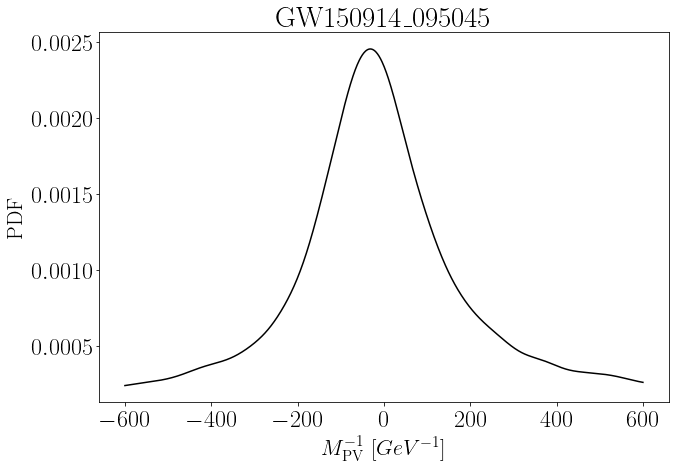

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170202_135657_ID0000009/H1L1V1-INFERENCE_GW170202_135657-1126259200-400.hdf
0.9155857510510932


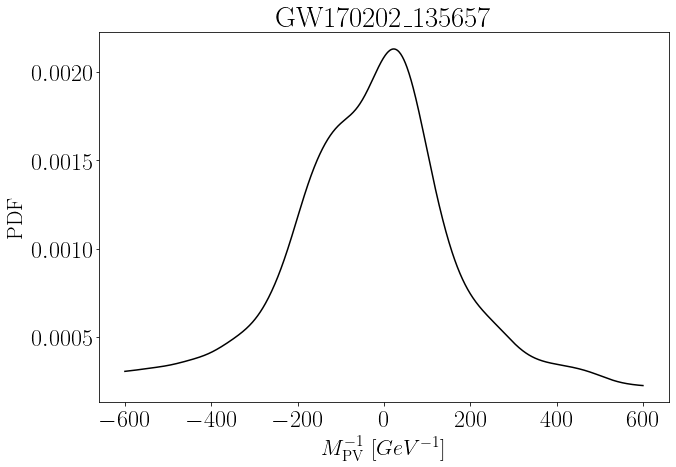

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190527_092055_ID0000011/H1L1V1-INFERENCE_GW190527_092055-1126259200-400.hdf
0.944999095610595


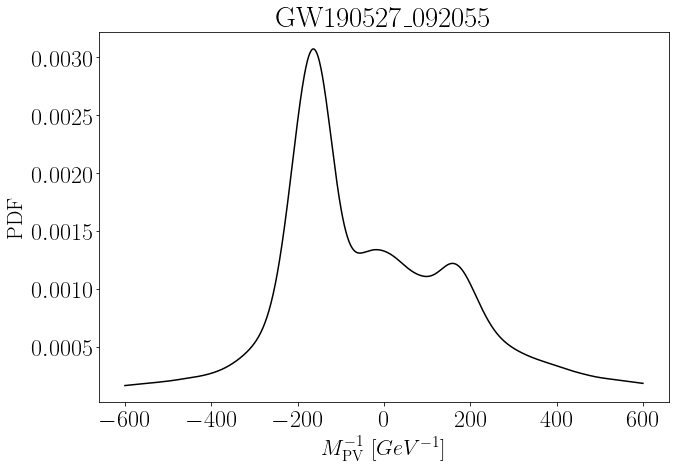

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190503_185404_ID0000048/H1L1V1-INFERENCE_GW190503_185404-1126259200-400.hdf
0.9373354561498474


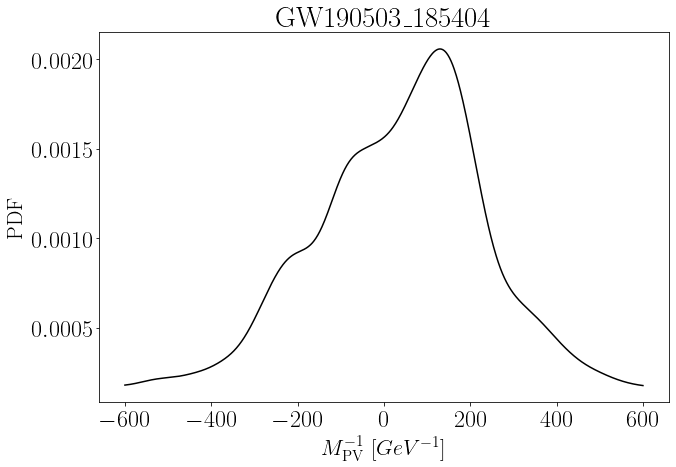

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190929_012149_ID0000026/H1L1V1-INFERENCE_GW190929_012149-1126259200-400.hdf
0.7633236111090143


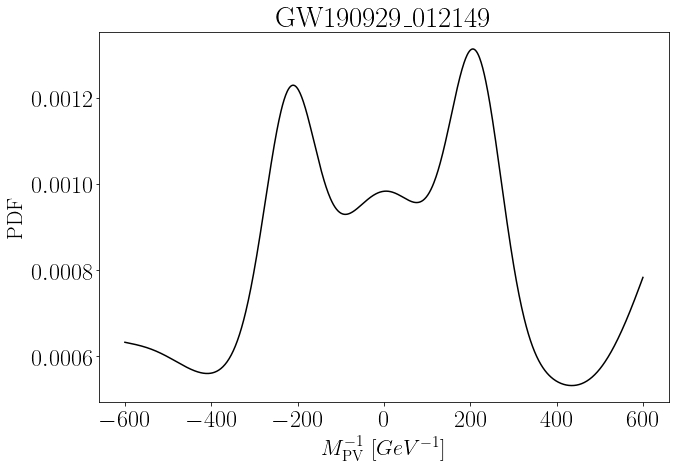

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190521_074359_ID0000054/H1L1V1-INFERENCE_GW190521_074359-1126259200-400.hdf
0.9511474816330389


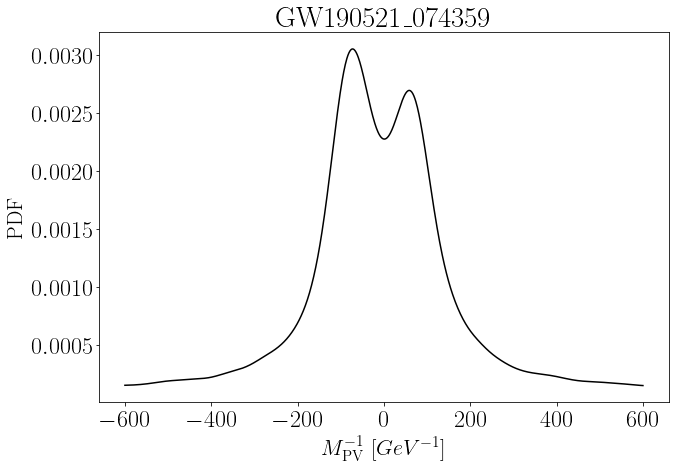

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190514_065416_ID0000016/H1L1V1-INFERENCE_GW190514_065416-1126259200-400.hdf
0.9331282684611855


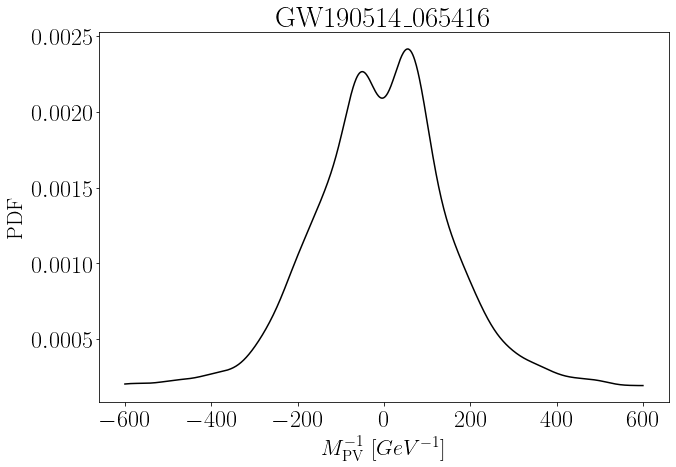

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190602_175927_ID0000024/H1L1V1-INFERENCE_GW190602_175927-1126259200-400.hdf
0.9267999881332686


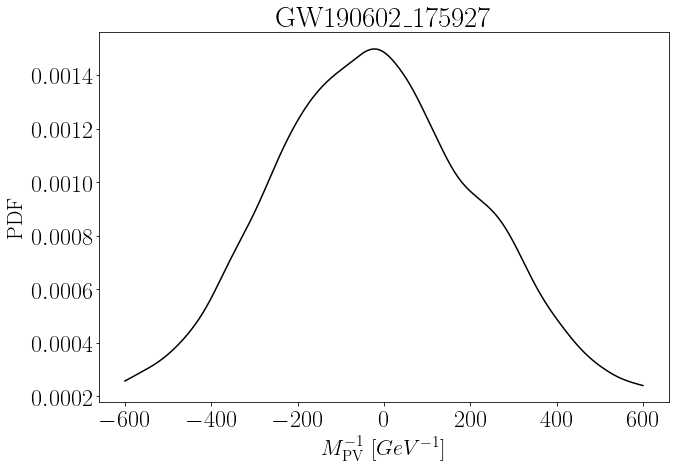

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190727_060333_ID0000006/H1L1V1-INFERENCE_GW190727_060333-1126259200-400.hdf
0.9489150785053362


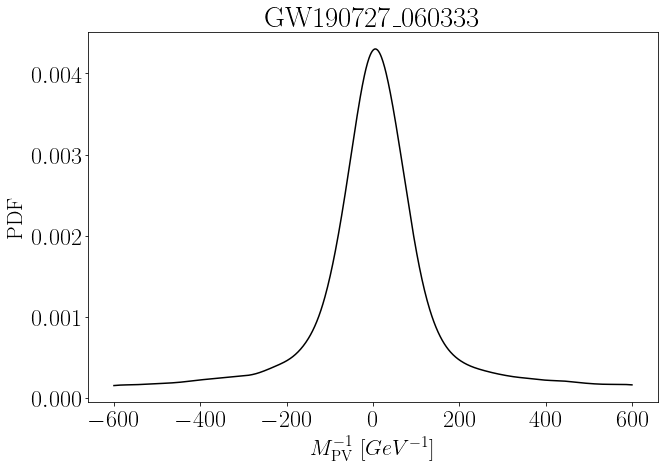

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw151012_095443_ID0000017/H1L1V1-INFERENCE_GW151012_095443-1126259200-400.hdf
0.910530623653819


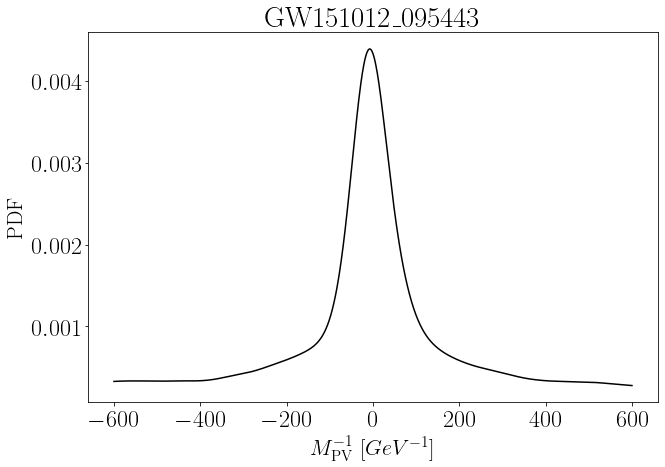

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190731_140936_ID0000049/H1L1V1-INFERENCE_GW190731_140936-1126259200-400.hdf
0.9346048243627653


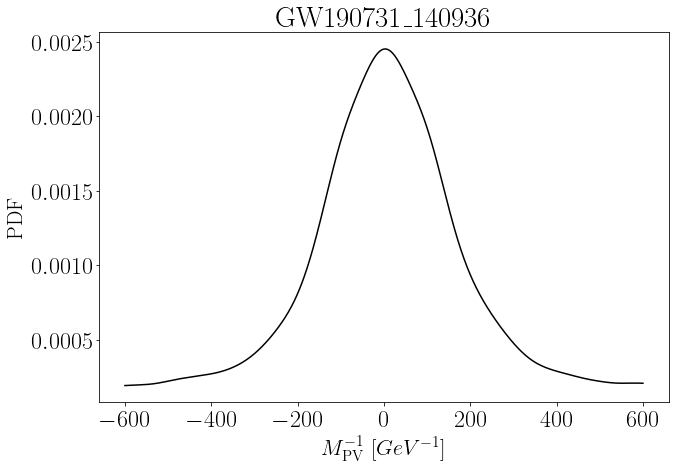

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190925_232845_ID0000047/H1L1V1-INFERENCE_GW190925_232845-1126259200-400.hdf
0.8956262518907109


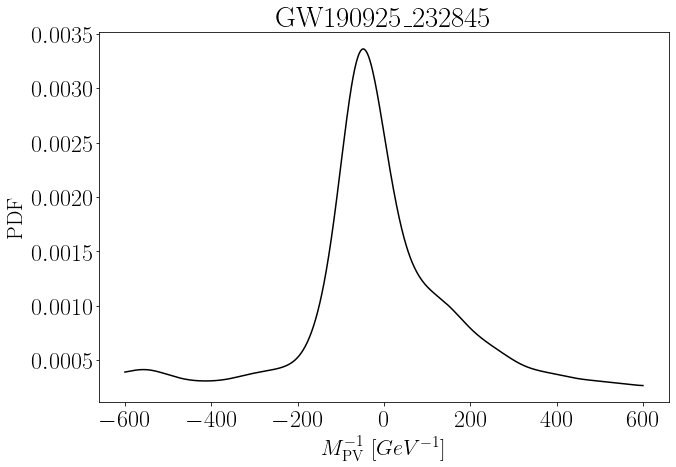

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170608_020116_ID0000021/H1L1V1-INFERENCE_GW170608_020116-1126259200-400.hdf
0.8760189279303304


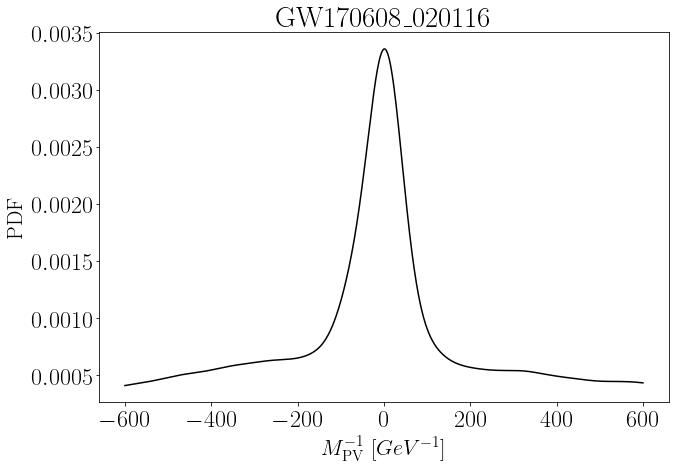

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170104_101158_ID0000044/H1L1V1-INFERENCE_GW170104_101158-1126259200-400.hdf
0.9269900933892438


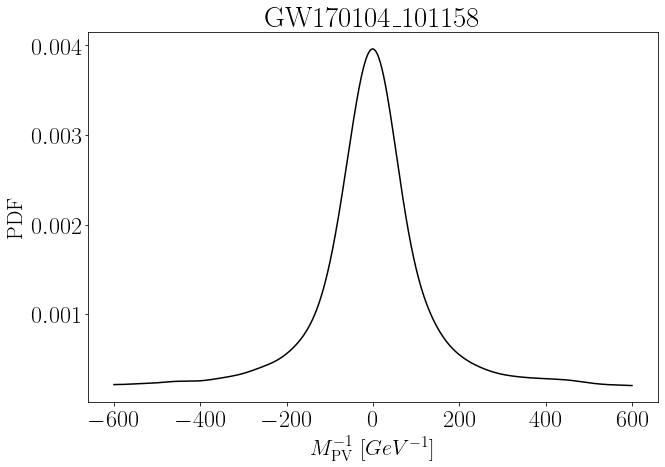

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170814_103043_ID0000037/H1L1V1-INFERENCE_GW170814_103043-1126259200-400.hdf
0.9118495999520367


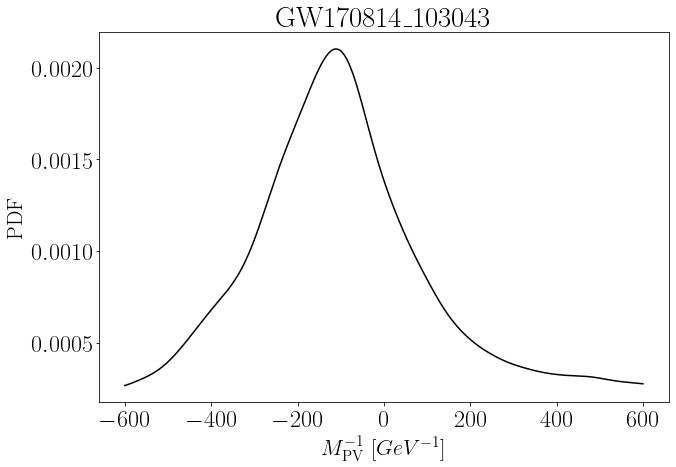

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190620_030421_ID0000013/H1L1V1-INFERENCE_GW190620_030421-1126259200-400.hdf
0.9379255661615334


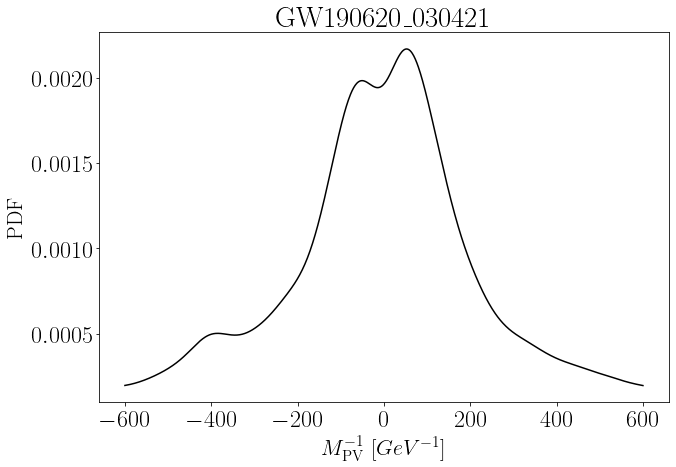

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw170809_082821_ID0000039/H1L1V1-INFERENCE_GW170809_082821-1126259200-400.hdf
0.9066499466308631


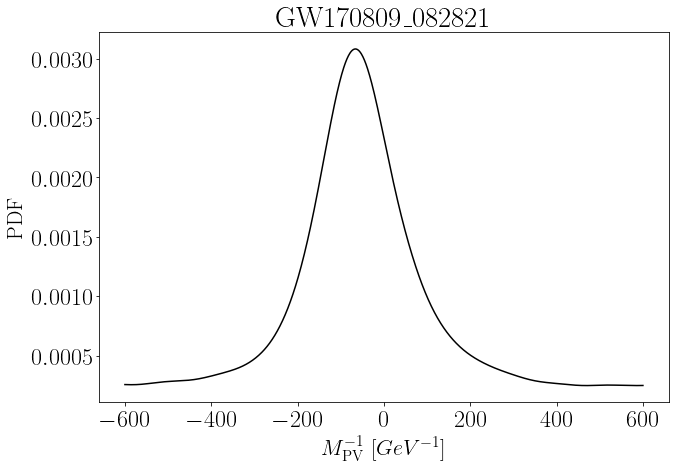

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190413_134308_ID0000005/H1L1V1-INFERENCE_GW190413_134308-1126259200-400.hdf
0.9485155696622033


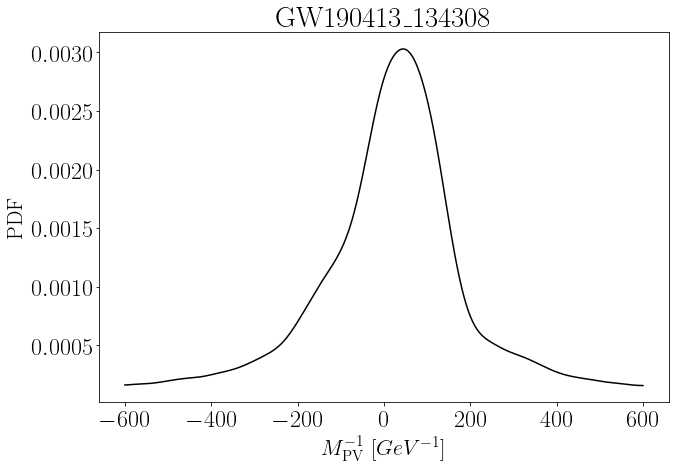

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190421_213856_ID0000027/H1L1V1-INFERENCE_GW190421_213856-1126259200-400.hdf
0.9312502699349935


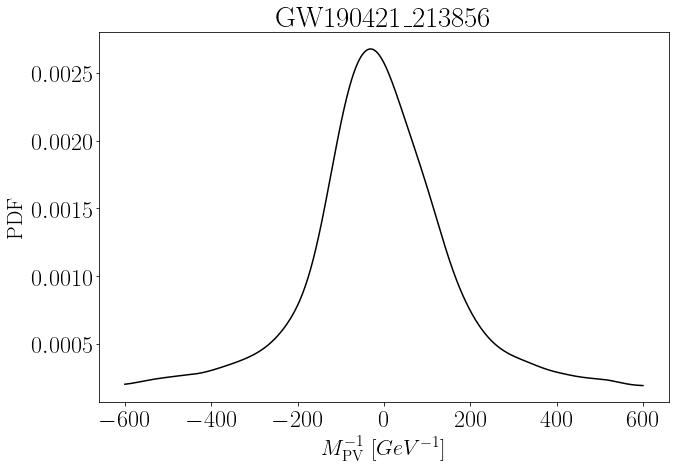

./../t2_redab/mpvnosmallrun_output/local-site-scratch/work/mpvnosmallrun-main_ID0000001/mpvnosmallrun-gw190706_222641_ID0000046/H1L1V1-INFERENCE_GW190706_222641-1126259200-400.hdf
0.9215911855725291


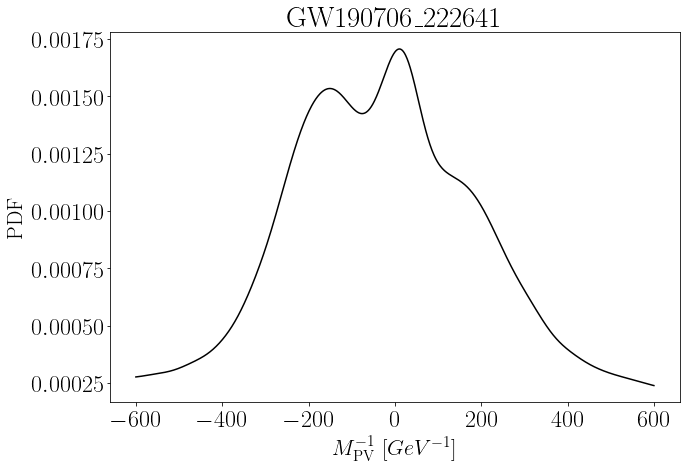

./../t3_default_rerun4/mpvnosmallrun_output/samples_files/H1L1V1-INFERENCE_GW190828_065509-1126259200-400.hdf
0.9242635120402409


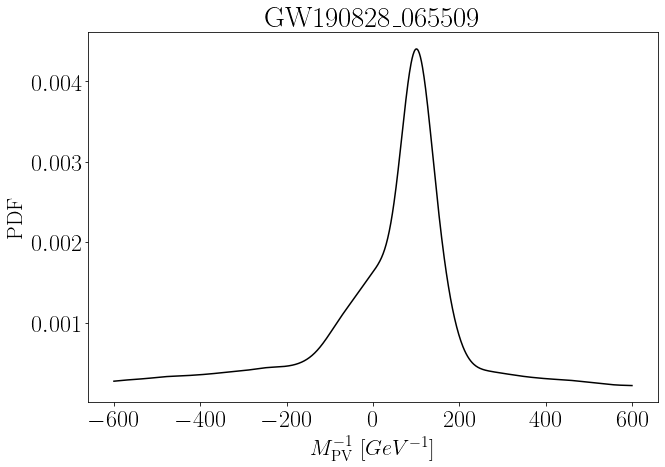

./../t3_default_rerun4/mpvnosmallrun_output/samples_files/H1L1V1-INFERENCE_GW190930_133541-1126259200-400.hdf
0.8662690203709906


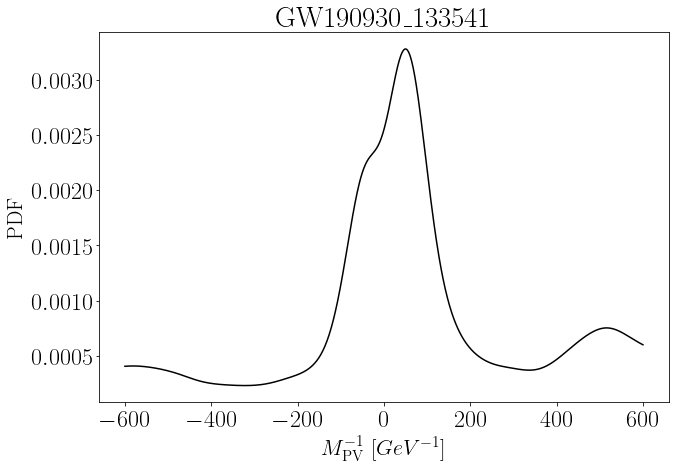

./../t3_default_rerun4/mpvnosmallrun_output/samples_files/H1L1V1-INFERENCE_GW170823_131358-1126259200-400.hdf
0.933126823470303


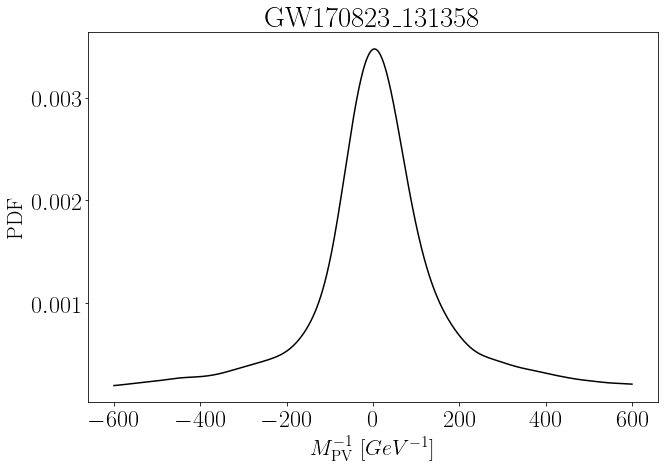

./../t3_default_rerun4/mpvnosmallrun_output/samples_files/H1L1V1-INFERENCE_GW190512_180714-1126259200-400.hdf
0.9307941845654454


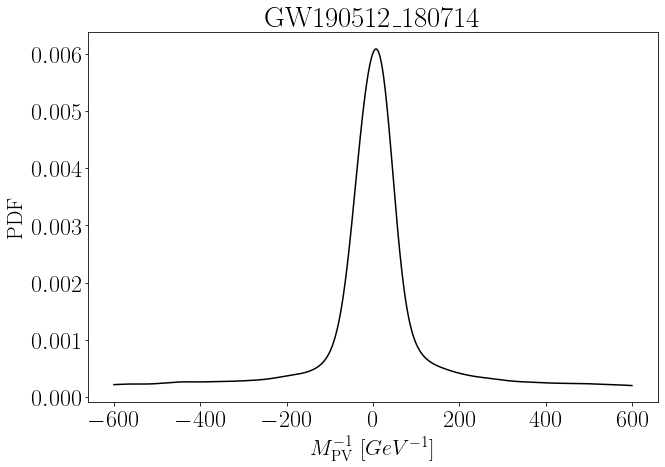

/work/yifan.wang/gw190521_mpvinverse/1019_nosmall/1107/mpi-190924/mpirun_output/samples_files/H1L1V1-INFERENCE_GW190924_021846_XPHM-1126259200-400.hdf
1.000000000000005


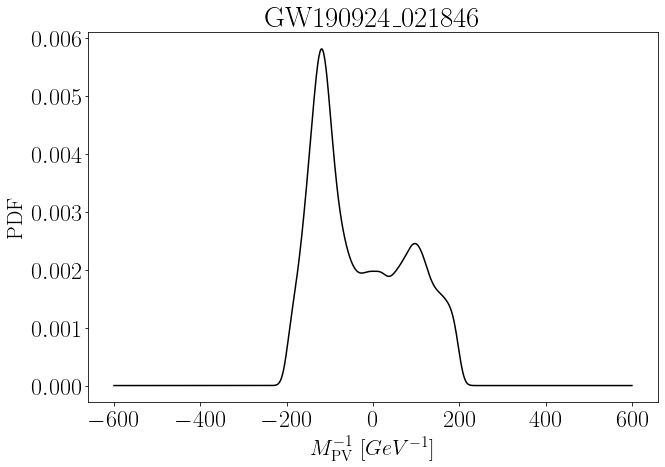

/work/yifan.wang/gw190521_mpvinverse/1019_nosmall/1107/mpi-190725/mpvnosmallrun_output/samples_files/H1L1V1-INFERENCE_GW190725_174728-1126259200-400.hdf
0.7921603105274589


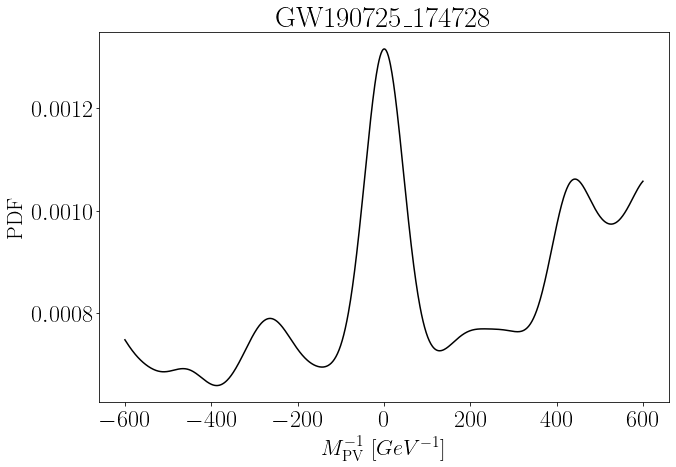

/work/yifan.wang/gw190521_mpvinverse/1019_nosmall/1107/mpi-190728/mpvnosmallrun_output/samples_files/H1L1V1-INFERENCE_GW190728_064510-1126259200-400.hdf
0.9953117077966436


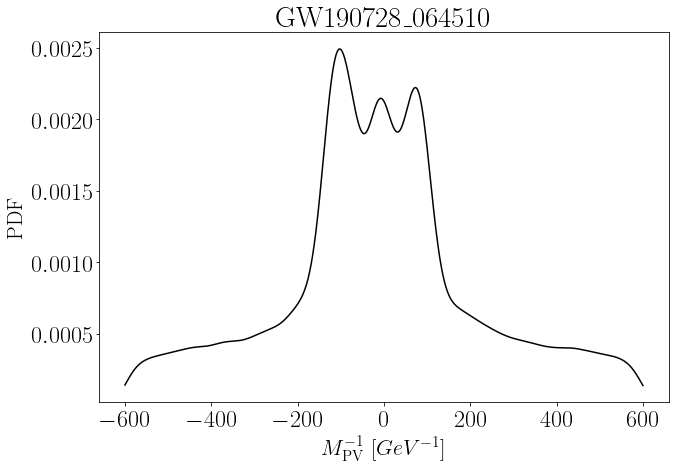

./../bns/t1/bns-parity_output/samples_files/H1L1V1-INFERENCE_GW190425_081805-1126259200-400.hdf
0.742615508271802


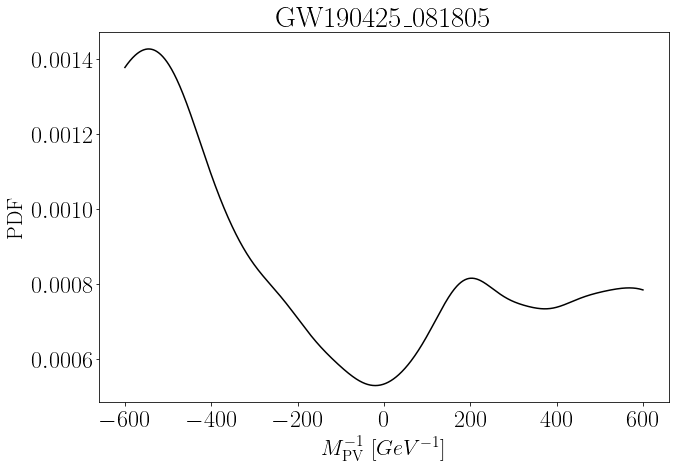

./../bns/t1/bns-parity_output/samples_files/H1L1V1-INFERENCE_GW170817_124104-1126259200-400.hdf
0.6846358835372435


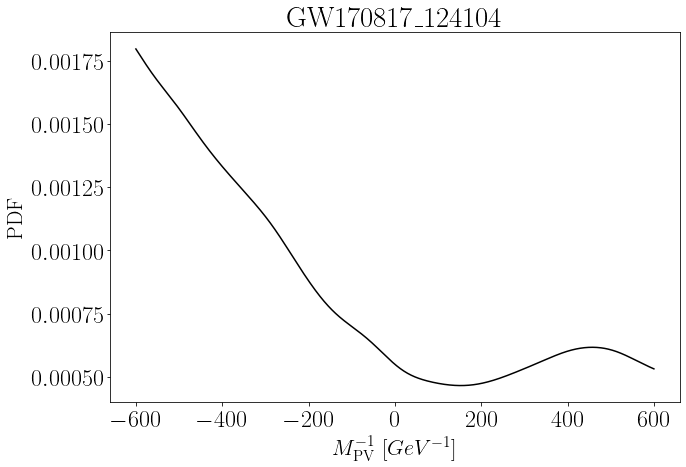

In [83]:
binmin = -600
binmax = 600
binnum = int(1e3)
bins = np.linspace(binmin,binmax,binnum)

combine = np.ones(len(bins))

for i in range(len(mpvinv)):
    print(posdirect[i])
    title = posname[i].split('_')[1] + '\_' + posname[i].split('_')[2].split('-')[0]
    savename = posname[i].split('_')[1] + '_' + posname[i].split('_')[2].split('-')[0]
    data = mpvinv[i]
    kde = stats.gaussian_kde(data)
    datacache = kde(bins)
    norm = np.sum(datacache)*(bins[2]-bins[1])
    print(norm)
    plt.figure()
    plt.plot(bins, kde(bins)/norm,color='black')
    plt.xlabel(r'$M_\mathrm{PV}^{-1}~[GeV^{-1}]$')
    plt.ylabel('PDF')
    plt.title(str(title))
    plt.savefig('figs/'+savename+'.pdf',bbox_inches='tight')
    plt.show()
    
#ax.legend()
#ax.set_xlim(0,5)
#ax.axvline(1.12,0,10,linestyle='--',color='black',alpha=0.7,label='90% upper limit')
#plt.set_xlabel(r'$M_\mathrm{PV}^{-1}~[GeV^{-1}]$')
#plt.set_ylabel('Probability Densitiy')
#fig.savefig('figure_Mpv.pdf',bbox_inches='tight')